# Lab 3 Template

**Author:** Leo Quintana

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice Monte Carlo integration methods and implement the Ising model. We'll explore how statistical methods can be used to solve complex physical problems numerically.

## Key Concepts
- Monte Carlo integration -- rejection method
- Statistical sampling and uncertainty
- Ising model and phase transitions
- Metropolis algorithm -- probability condition


## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [2]:
# TODO: Import numpy, matplotlib.pyplot, and any other necessary libraries

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Part I: Sphere in 3D Monte Carlo Integration

We will use Monte Carlo methods to calculate the mass of a sphere with different density distributions. The basic idea is to:
1. Generate random points in a cube that encloses the sphere
2. Check which points fall inside the sphere
3. Use these points to estimate integrals

## Part A: Uniform Density (3 pt)

For a sphere of radius 1 with uniform density ρ = 2.0, calculate the mass using Monte Carlo integration.

**Monte Carlo Integration Theory:**

Monte Carlo integration is a powerful numerical technique that uses random sampling to estimate integrals. For a 3D sphere problem, we:

1. **Enclosing Volume**: Use a cube from [-1,1]³ (volume = 8) that contains the unit sphere
2. **Random Sampling**: Generate N random points uniformly distributed in this cube
3. **Hit-or-Miss**: Check which points fall inside the sphere (x² + y² + z² < 1)
4. **Integration Formula**: Estimate the integral using:
   $$\text{Mass} = V_{cube} \times \frac{1}{N} \sum_{i=1}^{N} \rho(x_i, y_i, z_i) \times I(x_i, y_i, z_i)$$
   where I(x,y,z) = 1 if point is inside sphere, 0 otherwise

**Statistical Uncertainty:**
- Standard error decreases as σ ∝ 1/√N (slow convergence!)
- Uncertainty estimate: σ ≈ np.sqrt(p * (1 - p) / N) * cube_volume * density, where p is fraction of acceptance.
- For uniform distribution in [-1,1]: np.sqrt(p * (1 - p)) = √((1-(-1))²/12) = √(1/3) ≈ 0.577
check if it's true.


In [13]:
# TODO: Step 1 - Generate random points function
# Use np.random.uniform(-1.0, 1.0, N) for each coordinate
np.random.seed(42)
def generate_random_points(N):
    # Generate N random points in the range [-1, 1] for each coordinate (x, y, z)
    x_point = np.random.uniform(-1.0, 1.0, N)
    y_point = np.random.uniform(-1.0, 1.0, N)
    z_point = np.random.uniform(-1.0, 1.0, N)
    return x_point, y_point, z_point

# TODO: Step 2 - Index function for sphere  
# Check condition: x² + y² + z² < 1

def inside_sphere(x_point, y_point, z_point):
    #Use the equation for a sphere to determine if points are inside
    (x_point**2 + y_point**2 + z_point**2) <= 1
    return (x_point**2 + y_point**2 + z_point**2) <= 1

# TODO: Step 3 - Uniform density function
# Return constant density = 2.0 for all points
def uniform_density(x_point, y_point, z_point):
    return 2.0

# TODO: Step 4 - Mass calculation with uncertainty
# Apply Monte Carlo formula: V_cube/N * sum(density * inside)
# Calculate uncertainty: V_cube * 0.577 / sqrt(N)

theoretical = 4/3 * np.pi * 2.0
def monte_carlo_mass(N):
    V_cube = 8.0 # cube volume
    x_point, y_point, z_point = generate_random_points(N) # Generate random points
    density = uniform_density(x_point, y_point, z_point) # Get density values
    inside = inside_sphere(x_point, y_point, z_point) # check whether points are inside sphere
    mass_estimate = (V_cube / N) * np.sum(density * inside) # use monte carlo formula to estimate mass
    uncertainty = V_cube * 0.577 / np.sqrt(N) # calculate uncertainty
    print(f'Mass estimate (N=100): {mass_estimate:.3f} ± {uncertainty:.3f}')
    print(f'Theoretical value: {theoretical:.3f}')
    print(f'Relative error: {abs(mass_estimate - theoretical)/theoretical * 100:.1f}%')
    return mass_estimate, uncertainty


# TODO: Test with N=100 and print results
monte_carlo_mass(100)

Mass estimate (N=100): 8.160 ± 0.462
Theoretical value: 8.378
Relative error: 2.6%


(8.16, 0.46159999999999995)

**Convergence Analysis:**

Study how Monte Carlo estimates improve with more samples (N).

**Key Concepts:**
- Error decreases as 1/√N (slow convergence)

Mass estimate (N=100): 8.000 ± 0.462
Theoretical value: 8.378
Relative error: 4.5%
Mass estimate (N=100): 8.844 ± 0.139
Theoretical value: 8.378
Relative error: 5.6%
Mass estimate (N=100): 8.249 ± 0.100
Theoretical value: 8.378
Relative error: 1.5%
Mass estimate (N=100): 8.381 ± 0.083
Theoretical value: 8.378
Relative error: 0.0%
Mass estimate (N=100): 8.344 ± 0.072
Theoretical value: 8.378
Relative error: 0.4%
Mass estimate (N=100): 8.434 ± 0.064
Theoretical value: 8.378
Relative error: 0.7%
Mass estimate (N=100): 8.416 ± 0.059
Theoretical value: 8.378
Relative error: 0.5%
Mass estimate (N=100): 8.441 ± 0.055
Theoretical value: 8.378
Relative error: 0.8%
Mass estimate (N=100): 8.345 ± 0.051
Theoretical value: 8.378
Relative error: 0.4%
Mass estimate (N=100): 8.370 ± 0.048
Theoretical value: 8.378
Relative error: 0.1%
Mass estimate (N=100): 8.366 ± 0.046
Theoretical value: 8.378
Relative error: 0.1%
Mass estimate (N=100): 8.317 ± 0.044
Theoretical value: 8.378
Relative error: 0.7%
Mass

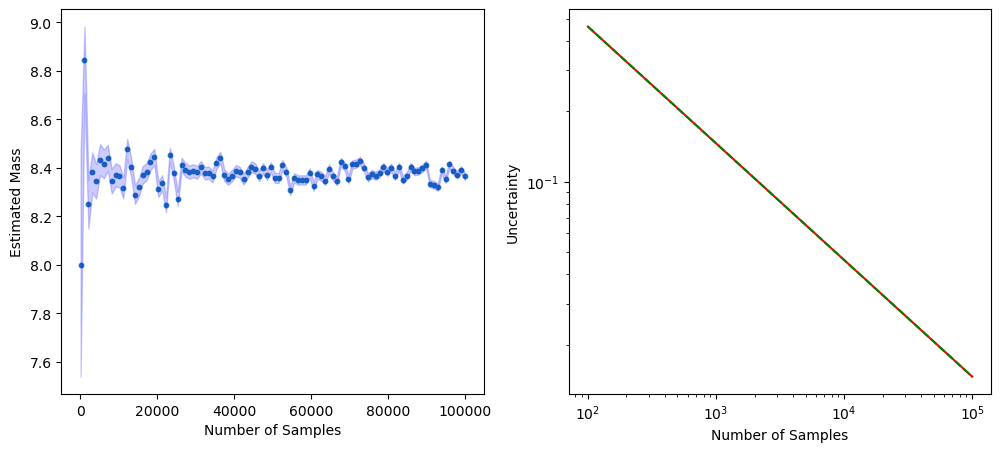

In [36]:
# TODO: Convergence analysis implementation

# Create N_values array from 100 to 100,000 along with the empty lists for masses and uncertainties
N_values = np.linspace(100, 100000, 100, dtype=int)
masses = []  # Create an empty numpy array for masses
uncertainties = [] # Create an empty numpy array for uncertainties

# TODO: Loop over N values and collect mass estimates and uncertainties
# loop over N Values we've set above
for N in N_values:
    mass, uncertainty = monte_carlo_mass(N) # get mass and uncertainty for each N
    masses.append(mass)  # append mass to the masses array
    uncertainties.append(uncertainty) # append uncertainty to list
    

# TODO: Create 2 figure with two subplots: convergence plot and uncertainty scaling to 1/√N 
#convert list to numpy array for easier plotting the +/- uncertainty
mass = np.array(masses) 
uncertainty = np.array(uncertainties)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Convergence Plot 
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Estimated Mass')
ax1.scatter(N_values, masses, label='MC estimates', s=10)
ax1.fill_between(N_values, mass - uncertainty, mass + uncertainty, color='blue', alpha=0.2, label='Uncertainty')

# Uncertainty Plot
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Uncertainty')
ax2.loglog(N_values, uncertainty, label='MC uncertainties', color='red')
theoretical_scaling = uncertainty[0] * np.sqrt(N_values[0] / N_values)
ax2.loglog(N_values, theoretical_scaling, label='1/√N scaling', color='green', linestyle='--')



# TODO: Print results
# Use the final error equations given to print the results
final_error = abs(masses[-1] - theoretical) / theoretical * 100
print(f"\nFinal results (N={N_values[-1]}):")
print(f"Mass: {masses[-1]:.4f} ± {uncertainties[-1]:.4f}")
print(f"Relative error: {final_error:.2f}%")

## Part B: Linear Density (3 pt)

**Variable Density:** ρ(r) = ρ₀r where r = √(x² + y² + z²)

**Theory:** 
- Density increases with distance from center
- Analytical result: M = πρ₀ = 2π ≈ 6.283
- Same Monte Carlo method, different density function

**Requirements:**
- Implement `linear_density(x, y, z)` function  
- Find N needed for 1% accuracy you can use scaling 
- Compare with theoretical value

In [62]:
# TODO: Implement linear density function
# Calculate r = sqrt(x² + y² + z²), then return ρ₀ × r
def linear_density(x_point, y_point, z_point):
    r = np.sqrt(x_point**2 + y_point**2 + z_point**2)
    linear_density = 2.0 * r
    return linear_density

# TODO: Find N for 1% accuracy
# Use scaling relationship: N_new = N_old × (σ_old / σ_target)²

# Define the old sample size and uncertainties

def monte_carlo_linear_mass(N):
    V_cube = 8.0 # cube volume
    x_point, y_point, z_point = generate_random_points(N) # Generate random points
    linear_density_ = linear_density(x_point, y_point, z_point) # Get density values
    inside = inside_sphere(x_point, y_point, z_point) # check whether points are inside sphere
    
    linear_mass_estimate = (V_cube / N) * np.sum(linear_density_ * inside) # use monte carlo formula to estimate mass
    linear_uncertainty = V_cube * 0.577 / np.sqrt(N) # calculate uncertainty
    
    return linear_mass_estimate, linear_uncertainty

def calculate_N_for_target_uncertainty():
    N_intial = 100
    mass_100, unc_100 = monte_carlo_linear_mass(N_intial)
    target_uncertainty = theoretical * 0.01
    N_1_percent = N_intial * (unc_100 / target_uncertainty)**2
    return N_1_percent, target_uncertainty, mass_100, unc_100


calculate_N_for_target_uncertainty()

# Calculate the new sample size using the scaling relationship

# TODO: Calculate mass with linear density large N
# Compare with theoretical value 

monte_carlo_linear_mass(5397)

#print(f"\nFor 1% accuracy:")
#print(f"Target uncertainty: {target_uncertainty:.4f}")
#print(f"Required N: {N_1_percent:.0f}")

#print(f"Verification: mass = {mass_1p:.4f} ± {unc_1p:.4f}")
#print(f"Actual error: {actual_error:.2f}%")


(6.1718791298376665, 0.06283325973409547)

In [ ]:
# Linear density function
def linear_density(x, y, z, p =2.0):
    r = np.sqrt(x**2 + y**2 + z**2)
    return p * r


# Calculate theoretical value
theoretical_linear_mass = np.pi * 2


# Monte Carlo integration function (reusable for any density)




## Bonus 1: Exponential Density (1 pt)

Consider a density that is an unit exponential function of the radius according to $$\rho(r)=1/\rho_0 e^{-\rho_0 r}$$

In [ ]:
# TODO: Implement exponential_density(x, y, z, rho0=1.0) returning exp(-rho0*r)/rho0

# TODO: Calculate mass_exp and unc_exp using monte_carlo_integration with N

# TODO: Create convergence comparison plot vs N,  set theoretical value for comparison

# Part II: Ising Model (4 pt)

**Statistical Mechanics Background:**

The **Ising model** is a mathematical model of ferromagnetism in statistical mechanics. It describes a system of discrete spins that can be in one of two states (+1 or -1) arranged on a lattice.

**Physical Motivation:**
- Models magnetic materials like iron
- Each lattice site represents an atomic magnetic moment
- Spins prefer to align with neighbors (ferromagnetic coupling)
- Temperature creates thermal fluctuations that oppose ordering
- Results in **phase transition** between ordered and disordered states

**Energy Function:**
$$H(S)=-\frac{J}{2}\sum_{i,j} s_{i,j} (s_{i+1,j}+s_{i-1,j}+s_{i,j+1}+s_{i,j-1})$$

Where:
- **J > 0**: Ferromagnetic coupling (favors parallel spins)
- **⟨i,j⟩**: Sum over nearest neighbors only
- **s_i ∈ {-1, +1}**: Spin values

Without loss of generizability, we choose a parameterization that $J=1$ and $k_B=1$.

**Key Physics:**
- **Low T**: Thermal energy << J → spins align → ordered (ferromagnetic) phase
- **High T**: Thermal energy >> J → spins random → disordered (paramagnetic) phase  
- **Critical temperature T_c**: Phase transition occurs
- **2D Ising exact result**: T_c = 2J/ln(1+√2) ≈ 2.269 (for J=1)

**Metropolis Algorithm:**
Uses Monte Carlo sampling to generate configurations according to Boltzmann distribution:
P(configuration) ∝ $e^{-\Delta E/T}$, with $T=1.5$.

**Algorithm Steps:**
1. Choose random spin
2. Calculate energy change ΔE if flipped  
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat many times to reach equilibrium


## Step 1: Initialize Lattice

**Lattice Setup:**
- 10×10 lattice with periodic boundaries (edges wrap around)
- Initial state: all spins = +1
- Each spin has exactly 4 neighbors

In [67]:
# TODO: Initialize 10x10 lattice with all spins = +1
# TODO: Test lattice creation and print shape and initial magnetization
#create magnetization formula
# Initialize arrays to store results
N_steps = 10000  
delta_N = 100
Steps = []
M_avg = []

# Initialize lattice
L = 10
lattice = np.ones((L, L), dtype=int)
T = 1.5
# Function to calculate magnetization
def calculate_magnetization(lattice):
    magnetization = np.sum(lattice)
    return magnetization

print(f"Lattice shape: {lattice.shape}")
print(f"Initial magnetization: {calculate_magnetization(lattice)}")

Lattice shape: (10, 10)
Initial magnetization: 100


## Step 2: Energy Calculation

**Energy Function:** E = -J Σ s_i s_j (sum over nearest neighbors)

**Key Points:**
- Parallel spins (+1,+1 or -1,-1): contribute -J (lower energy)
- Antiparallel spins (+1,-1): contribute +J (higher energy)  
- Use periodic boundaries: neighbors wrap around edges
- Avoid double-counting pairs

**Test if your energy function is correct:**

for a Test lattice (3x3):

[[1 1 1]
 [1 1 1]
 [1 1 1]]
 
Total energy: -18.0

In [78]:
# TODO: Calculate total energy from 4 neighbor coordinates (avoid double counting!)
# Count each pair once: only right and down neighbors

def total_energy(lattice):
    energy = 0 # Intialize energy
    L = lattice.shape[0] # Get lattice size
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            # Right neighbor
            right = lattice[i, (j + 1) % L]
            # Down neighbor
            down = lattice[(i + 1) % L, j]
            energy += -S * (right + down)
    return energy, L

# TODO: Energy change if spin (i,j) flips
# ΔE = -2 × local_energy (since spin changes sign)

def delta_energy(lattice, i, j):
    L = lattice.shape[0]
    S = lattice[i, j]
    # Sum of neighboring spins
    neighbors = lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] + lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
    dE = 2 * S * neighbors
    return dE

# TODO: Test your energy function with small lattice and print results 
# create 3 by 3 lattice with all spins = +1 for our test
# calculate change in energy if we flip the center spin
test_lattice = np.ones((3, 3), dtype=int)
test_energy =  total_energy(test_lattice)
test_delta = delta_energy(test_lattice, 1, 1)


print(f'Total energy of test Lattice: {test_energy}')
print(f'Total change in energy if center spin flipped: {test_delta}')


Total energy of test Lattice: (-18, 3)
Total change in energy if center spin flipped: 8


## Step 3: Metropolis Algorithm: Magnetization vs. N

Calculate the magnitization $$<M>=\frac{1}{N} \sum_{i,j\in\Lambda} s_{i,j}$$ as function of MC steps $N$. Plot $<M>$ as function of $N$ where $N$ starts from 0 to 10000 with step size $\Delta N=100$. Does the magnitization converge to an equillibrium value?

**Algorithm:**
1. Choose random spin
2. Calculate energy change ΔE if flipped
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat for N times

**Important Grading requirement:**
> **💡 Note:** This MC algorithm is partially given, but you need to explain what each line stands for.


In [81]:
# TODO: Implement Metropolis algorithm
lattice = np.ones((L, L), dtype=int)  # create lattice all spin +1

# TODO: Monte Carlo sweep (L² attempts) using Metropolis algorithm 
# Perform L² individual spin flip attempts, return updated configuration

def MCmove(config, T):
     for i in range(L): 
         for j in range(L):
                 a = np.random.randint(0, L) # Pick a random column
                 b = np.random.randint(0, L) # Pick a random row
                 spin =  config[a, b] # The spin of the randomly selected cell
                 neighbors = config[(a+1)%L,b] + config[a,(b+1)%L] + config[(a-1)%L,b] + config[a,(b-1)%L] # Sum of the 4 neighboring cells
                 delE = 2*spin*neighbors # Explain why
                 if delE < 0:  # If energy is decreasing, we accept the flip 
                     spin *= -1 # This flips the spin
                 elif np.random.rand() < np.exp(-delE/T): # If it is increasing, we only accept with boltzmann probability

                     spin *= -1 # This flips the spin
                 config[a, b] = spin # Update the configuration
     return config

# TODO: Full simulation with observable measurement
# Run multiple sweeps (MC steps), sample magnetization and energy every few sweeps
for N in range(100, N_steps + 1, delta_N):
    Steps.append(N)
    M = 0
    for step in range(N):
        lattice = MCmove(lattice, T)
        if step % 100 == 0:  # Sample every 10 steps
            M += abs(calculate_magnetization(lattice))
    M_avg.append(M / (N / 10))  # Average magnetization

# TODO:Plot average Magnetization as function of N (number of MC steps)
plt.figure(figsize=(8, 6))

plt.scatter(Steps, M_avg, s=50, marker='o', color='RoyalBlue')
plt.xlabel('N (T = {:.2f})'.format(T), fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20); 

KeyboardInterrupt: 

## Bonus 2: Temperature Study (4 pt)

**Goal:** Observe ferromagnetic phase transition in physics observables around T_critical= 2.0 / np.log(1 + np.sqrt(2))


**Method:**
- Study temperatures $T$ from 1.5 to 3.25 with 10 steps.
- For each T: equilibrate with 10000 MC sampling → measure → record averages 
- Plot Magnetization, Energy, Susceptibility, Heat capacity vs. temperature

**Expected:** 
- Low T: high |m|, low energy (ordered)
- High T: low |m|, high energy (disordered)
- Transition around T_c = 2.269

**Observable Quantities:**
- **Magnetization**: $\langle m \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} M_i$ (order parameter) - measures degree of spin alignment
- **Energy**: $\langle e \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} E_i$ (average energy per spin) - indicates thermal state of the system
- **Susceptibility**: $\chi = \frac{1}{k_B T}(\langle M^2 \rangle - \langle M \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i\right)^2\right)$ - measures response to external magnetic field, peaks at phase transition
- **Heat capacity**: $C = \frac{1}{k_B T}(\langle E^2 \rangle - \langle E \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i\right)^2\right)$ - quantifies energy fluctuations, shows anomaly at critical temperature

*Note that we have chosen $k_B=1$ for this exercise*

In [ ]:
# TODO: Scan temperatures from 1.5 to 3.25 with 10 steps
# Loop over temperatures: equilibrate, measure, record averages

# TODO: Create 4 plots: magnetization vs T, energy vs T, Susceptibility vs T, Specifc Heat vs T
# Add vertical line at theoretical T_c 

# TODO: Print relative difference between empirical and theoretical T_c
# print(f"Relative difference: {abs(T_empirical - T_critical)/T_critical * 100:.1f}%")

# Discussion

**Answer the following questions based on your results:**

## Part I: MC Integration

1. What was your theoretical mass for uniform density and linear density (and exponential density if you did bonus)?
2. How fast did MC integration converge to $1\%$ error for each density distribution?
2. Does the uncertainty scale as expected?

## Part II: Ising Model  
1. What critical temperature did you observe? Compare your T_c with theoretical value (2.269).

## Submission Instructions

> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
> 
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab3_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
> 
> Make sure all cells have been executed and all outputs are visible before downloading!